In [1]:
# import the package and the dataset
import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=0)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=4, shuffle=True, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [2]:
# show some images
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s' % classes[labels[j]] for j in range(4)))



<Figure size 640x480 with 1 Axes>

 frog  carplane  cat


In [3]:
# define the CNN
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [6]:
# define the loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(4):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print('[epoch: %d, num: %5d] loss: %3f' %
                  (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0

print('Finished Training')


[epoch: 1, num:  2000] loss: 1.212244
[epoch: 1, num:  4000] loss: 1.212173
[epoch: 1, num:  6000] loss: 1.208368
[epoch: 1, num:  8000] loss: 1.193428
[epoch: 1, num: 10000] loss: 1.170958
[epoch: 1, num: 12000] loss: 1.168127
[epoch: 2, num:  2000] loss: 1.094944
[epoch: 2, num:  4000] loss: 1.101996
[epoch: 2, num:  6000] loss: 1.096258
[epoch: 2, num:  8000] loss: 1.083608
[epoch: 2, num: 10000] loss: 1.075327
[epoch: 2, num: 12000] loss: 1.078281
[epoch: 3, num:  2000] loss: 1.004533
[epoch: 3, num:  4000] loss: 1.003006
[epoch: 3, num:  6000] loss: 1.026979
[epoch: 3, num:  8000] loss: 1.017035
[epoch: 3, num: 10000] loss: 1.024318
[epoch: 3, num: 12000] loss: 1.032888
[epoch: 4, num:  2000] loss: 0.934129
[epoch: 4, num:  4000] loss: 0.951594
[epoch: 4, num:  6000] loss: 0.966383
[epoch: 4, num:  8000] loss: 0.962447
[epoch: 4, num: 10000] loss: 0.940627
[epoch: 4, num: 12000] loss: 0.980885
Finished Training


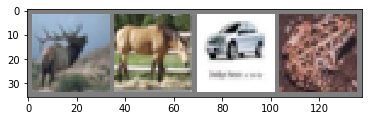

 deer  horse    car   frog 
Predicted:  plane  horse  plane   frog 
Accuracy of the network on the test images: 61 %


In [8]:
# Look at how the network performs on the dataset

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s '% classes[labels[j]] for j in range(4)))

outputs = net(images)


_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s '%classes[predicted[j]] for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100*correct/total))



In [ ]:
# Look at the accuracy of 10 classes
class_correct = list(0. for i in range(10))
